In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import sys 
sys.path.append('../../../codes/visualisations_src/')
from utils_distributions import plot_yearly_ts, plot_distribution_by_year, plot_count_distribution_by_year

In [2]:
path2results = "../tables/"
path2annuels = path2results + "annuels/"
path2annuels_flux = path2results + "annuels_flux/"
DEFAULT_YEARS = [2008, 2010, 2012, 2014, 2016]
QUERIED_TABLES = ['DCIR', 'IRBENR', 'IRIMBR']

In [3]:
# Parameters
DEFAULT_YEARS = [2008, 2010, 2012, 2014, 2016, 2018, 2020]
XSTART = "01-01-2008"
QUERIED_TABLES = ["DCIR", "IRBENR", "IRIMBR", "MCO", "SSR", "HAD"]


# Professionels de soins

## DAPRA

In [4]:
if 'DAPRAR' in QUERIED_TABLES:
    filename = 'COMPTE_PRA.csv'
    df = pd.read_csv(path2annuels+filename)
    df = df.groupby('year', as_index=False).agg({'count':'sum'})
    plot_yearly_ts(df, x_min=2008, x_max=2017, filename=filename, plot_type='bar')

In [5]:
if 'DAPRAR' in QUERIED_TABLES:
    filename = 'COMPTE_PRA.csv'
    df = pd.read_csv(path2annuels+filename)
    plot_count_distribution_by_year(df, years=[2010, 2016], filename=filename, plot_type='grouped_bars')

Pour les généralistes, le chiffre est à mettre au regard des 102300 déclaré par la drees en 2016. Il faudrait regarder le nombre de ces médecins qui ont effectivement une activité dans l'année pour avoir un vrai chiffre.

source: [10 000 médecins de plus depuis 2012, *Marie Anguis, Hélène Chaput et al., ER-05-2018*](https://drees.solidarites-sante.gouv.fr/IMG/pdf/er_1061.pdf)

In [6]:
if 'DAPRAR' in QUERIED_TABLES:
    filename = 'COMPTE_PRA_ACTIFS.csv'
    df = pd.read_csv(path2annuels+filename)
    plot_count_distribution_by_year(df, years=[2010, 2016], filename=filename, plot_type='grouped_bars')

## DAPRA depuis DCIR, volume d'actes

In [7]:
if 'DAPRAR' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_PRS_FLUX.csv'
    df = pd.read_csv(path2annuels_flux+filename)
    plot_count_distribution_by_year(df, years=[2010, 2016], filename=filename, plot_type='grouped_bars')

# Patients depuis IRBENR

### Année de naissance

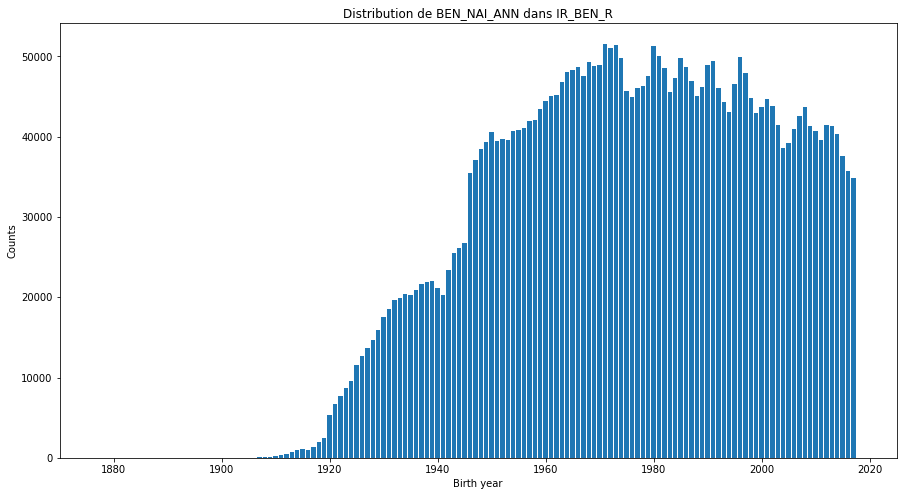

In [8]:
if 'IRBENR' in QUERIED_TABLES:
    figsize = (15, 8)
    df = pd.read_csv(path2annuels + "COMPTE_IRBEN.csv")
    df = df.groupby('BEN_NAI_ANN', as_index=False).agg({'count':'sum'})
    fig = plt.figure(figsize=figsize)
    ax = plt.bar(df["BEN_NAI_ANN"], df["count"])
    plt.xlim(1870, 2025)
    plt.xlabel("Birth year")
    plt.ylabel("Counts")
    plt.title("Distribution de BEN_NAI_ANN dans IR_BEN_R")

### RGM_COD

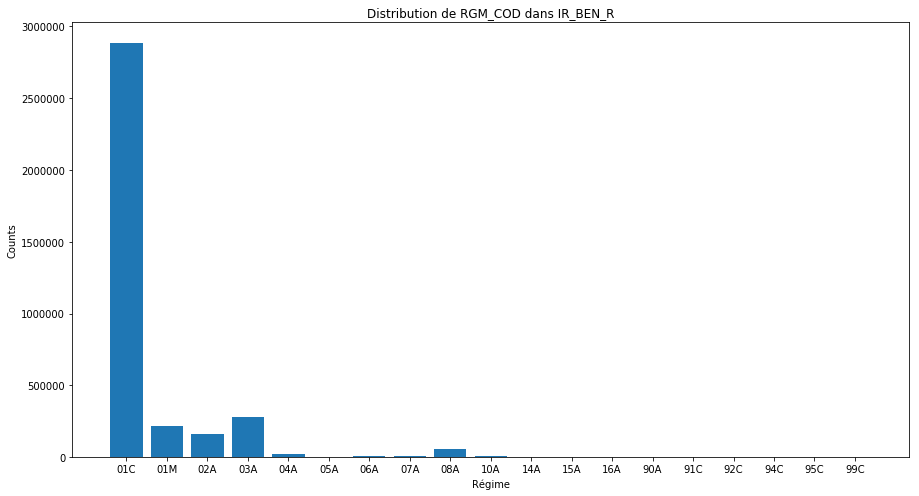

In [9]:
if 'IRBENR' in QUERIED_TABLES:
    df = pd.read_csv(path2annuels + "COMPTE_IRBEN.csv")
    df = df.groupby('RGM_COD', as_index=False).agg({'count':'sum'})
    fig = plt.figure(figsize=figsize)
    ax = plt.bar(df['RGM_COD'], df["count"])
    plt.xlabel("Régime")
    plt.ylabel("Counts")
    plt.title("Distribution de RGM_COD dans IR_BEN_R")

### Sexe ratio

In [10]:
if 'IRBENR' in QUERIED_TABLES:
    filename = path2annuels + 'COMPTE_IRBEN.csv'
    df = pd.read_csv(filename)
    df = df.groupby('BEN_SEX_COD', as_index=False).agg({'count':'sum'})
    df.head()
    nb_femmes = df.loc[df["BEN_SEX_COD"] == 2, "count"].values[0]
    nb_hommes = df.loc[df["BEN_SEX_COD"] == 1, "count"].values[0]
    print("Ratio Femmes = {:.4f} = {}/{}".format(nb_femmes / (nb_femmes + nb_hommes), nb_femmes, nb_femmes + nb_hommes))

Ratio Femmes = 0.5002 = 1827838/3653860


# Patients depuis DCIR

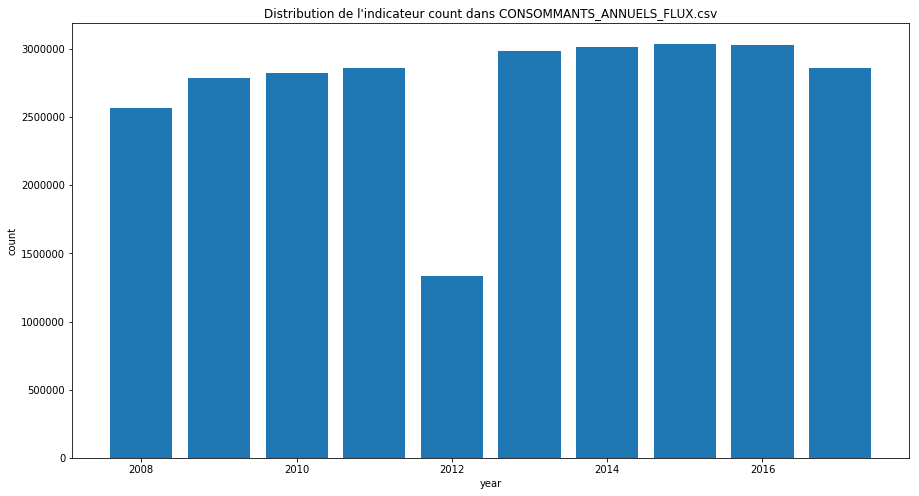

In [11]:
if 'DCIR' in QUERIED_TABLES:
    filename = 'CONSOMMANTS_ANNUELS_FLUX.csv'
    df = pd.read_csv(path2annuels_flux+filename)
    df = df.groupby('year', as_index=False).agg({"count": "sum"})
    plot_yearly_ts(df, filename=filename, plot_type='bar')

Filtered left : 14 outliers with mean value 671.36 and 164620/15806537 total counts
Filtered right : 0 outliers with mean value nan and 0/15806537 total counts


<Figure size 1080x576 with 0 Axes>

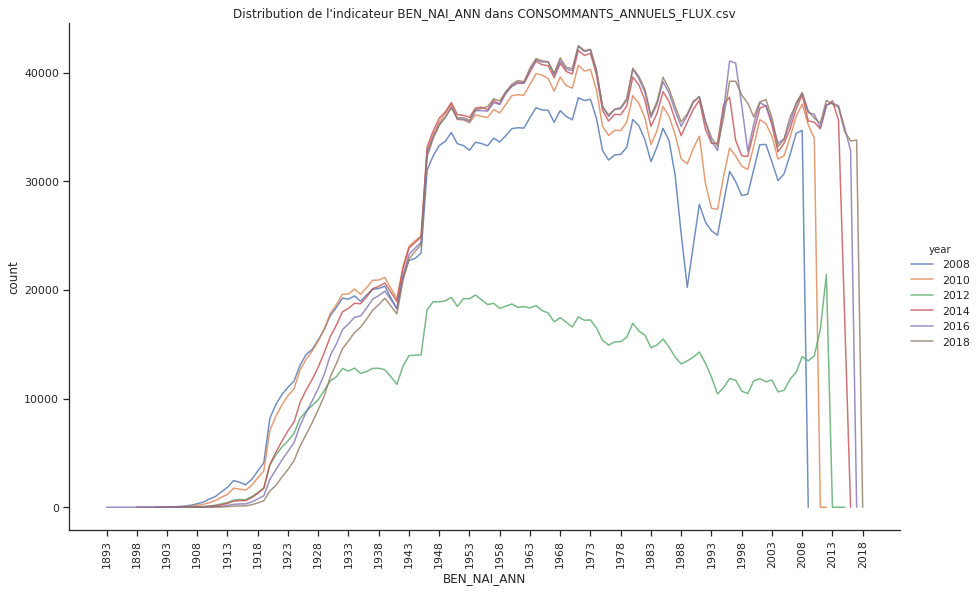

In [12]:
if 'DCIR' in QUERIED_TABLES:
    filename = 'CONSOMMANTS_ANNUELS_FLUX.csv'
    df = pd.read_csv(path2annuels_flux+filename)
    df = df.groupby(['year', 'BEN_NAI_ANN'], as_index=False).agg({"count": "sum"})
    plot_count_distribution_by_year(df, years=DEFAULT_YEARS, filename=filename, plot_type='lineplot', xticks_frequency=5, filter_in_range=(1890, 2020))

Filtered left : 0 outliers with mean value nan and 0/15806537 total counts
Filtered right : 5 outliers with mean value 9.00 and 164425/15806537 total counts


<Figure size 1080x576 with 0 Axes>

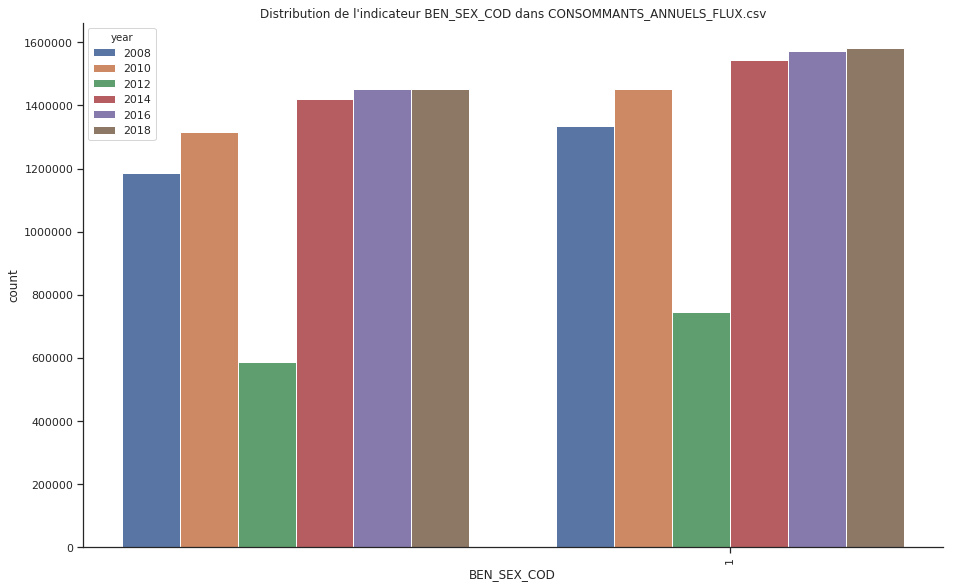

In [13]:
if 'DCIR' in QUERIED_TABLES:
    filename = 'CONSOMMANTS_ANNUELS_FLUX.csv'
    df = pd.read_csv(path2annuels_flux+filename)
    df = df.groupby(['year', 'BEN_SEX_COD'], as_index=False).agg({"count": "sum"})
    plot_count_distribution_by_year(df, years=DEFAULT_YEARS, filename=filename, plot_type='grouped_bars', filter_in_range=(1,2))

In [14]:
if 'DCIR' in QUERIED_TABLES:
    year = 2016
    nb_prestas_femmes = df.loc[(df['year']==year) & (df['BEN_SEX_COD'] == 2), 'count'].values[0]
    nb_prestas_hommes = df.loc[(df['year']==year) & (df['BEN_SEX_COD'] == 1), 'count'].values[0]
    ratio = nb_prestas_femmes / (nb_prestas_femmes + nb_prestas_hommes)

    print("Ratio prestastions femmes = {:.4f} = {}/({} + {})".format(ratio, nb_prestas_femmes, nb_prestas_femmes, nb_prestas_hommes))

Ratio prestastions femmes = 0.5203 = 1573552/(1573552 + 1451039)


<Figure size 1080x576 with 0 Axes>

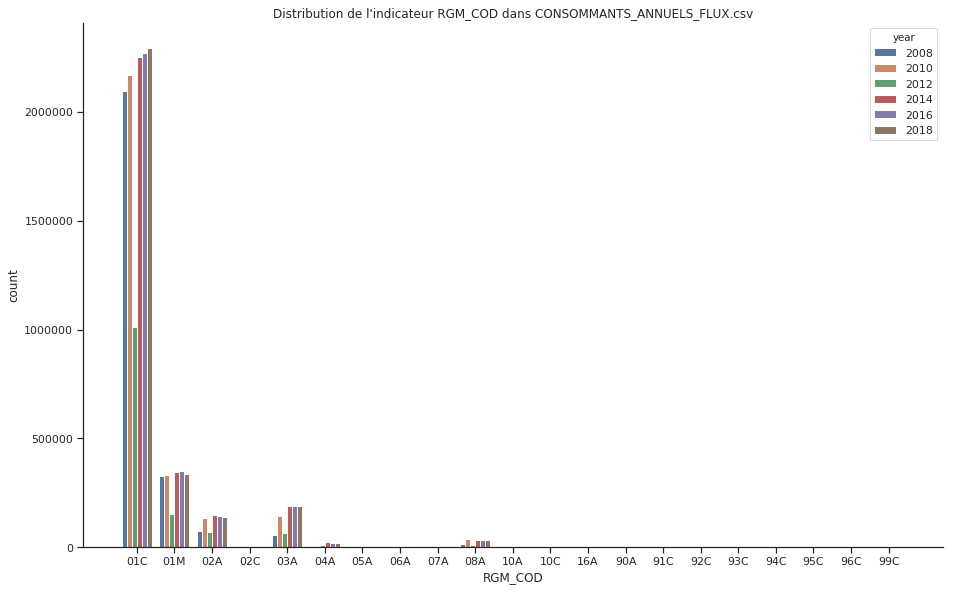

In [15]:
if 'DCIR' in QUERIED_TABLES:
    filename = 'CONSOMMANTS_ANNUELS_FLUX.csv'
    df = pd.read_csv(path2annuels_flux+filename)
    df = df.groupby(['year', 'RGM_COD'], as_index=False).agg({"count": "sum"})
    plot_count_distribution_by_year(df, years=DEFAULT_YEARS, filename=filename, plot_type='grouped_bars')

# ALDs

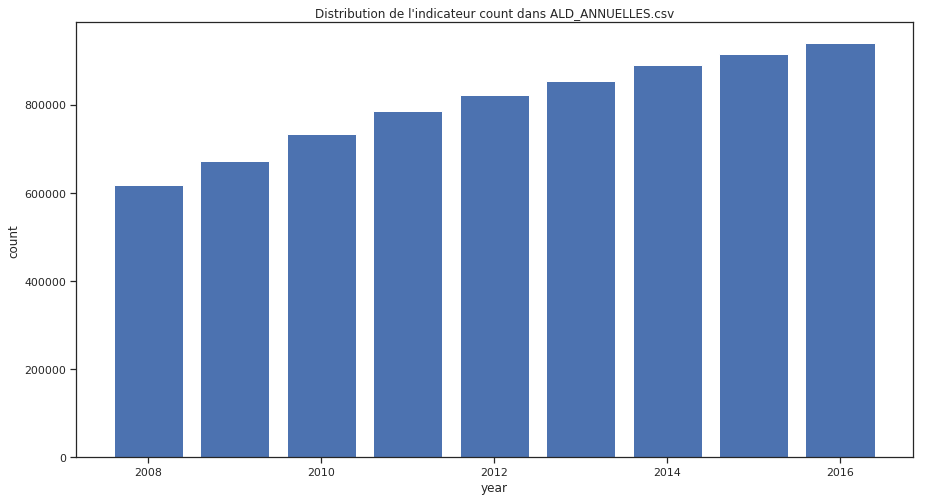

In [16]:
if 'IRIMBR' in QUERIED_TABLES:
    filename = 'ALD_ANNUELLES.csv'
    df = pd.read_csv(path2annuels+filename)
    df = df.groupby('year', as_index=False).agg({"count": "sum"})
    plot_yearly_ts(df, x_min=1950, x_max=2020, filename=filename, plot_type='bar')

Filtered left : 0 outliers with mean value nan and 0/4001951 total counts
Filtered right : 10 outliers with mean value 98.50 and 40631/4001951 total counts


<Figure size 1080x576 with 0 Axes>

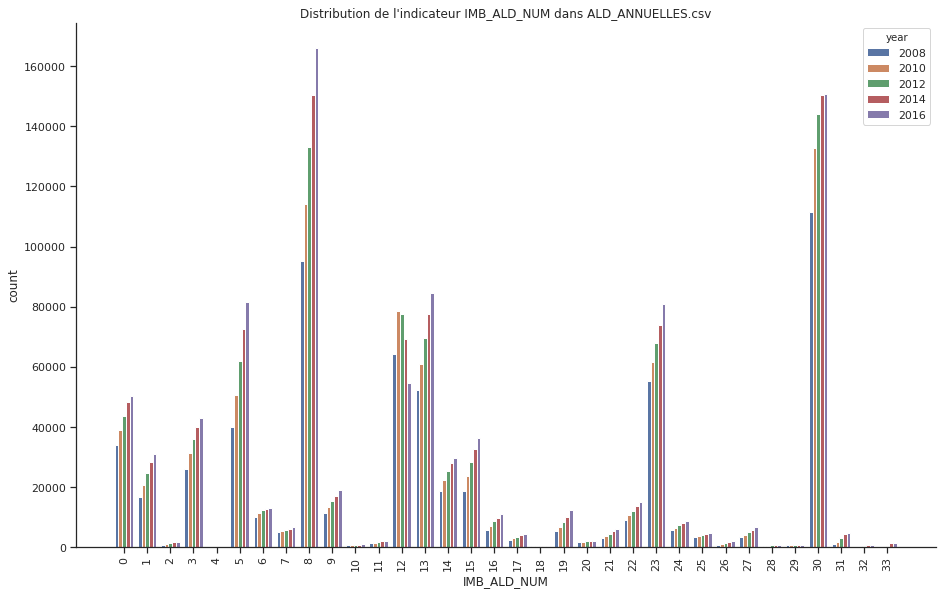

In [17]:
if 'IRIMBR' in QUERIED_TABLES:
    filename = 'ALD_ANNUELLES.csv'
    df = pd.read_csv(path2annuels+filename)
    #df = df.loc[:, ['year', 'IMB_ALD_NUM', 'count']]
    #df.loc[df.year == 2008,:]
    plot_count_distribution_by_year(df, years=DEFAULT_YEARS, filter_in_range=(0, 35), filename=filename, plot_type='grouped_bars', xticks_frequency=1)

# Comptes détaillés DCIR

<Figure size 1080x576 with 0 Axes>

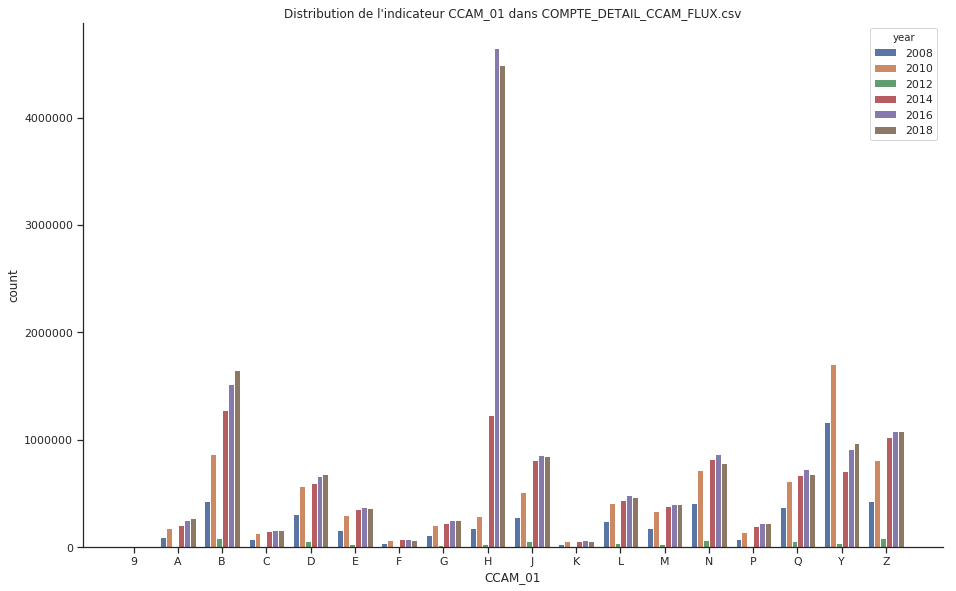

In [18]:
if 'DCIR' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_CCAM_FLUX.csv'
    df = pd.read_csv(path2annuels_flux+filename)
    #df.head()
    plot_count_distribution_by_year(df, years=DEFAULT_YEARS, filename=filename, plot_type='grouped_bars')

On trouve une augmentation énorme des actes en H (système digestif). Apparemment, selon le [site de l'ATIH](https://www.atih.sante.fr/sites/default/files/public/content/2671/introduction_ccam_descriptive_a_usage_pmsi_2015_version_3.pdf) (ou [ici les modifications historiques de la ccam](https://www.atih.sante.fr/version-39-de-la-ccam)), ils ont rajouté de nombreux actes médico-dentaires en 2015, ce qui pourrait expliquer la brutale augmentation des actes de ce chapitre (ex : détartrage des dents sur une arcade (HBJD003)).

<Figure size 1080x576 with 0 Axes>

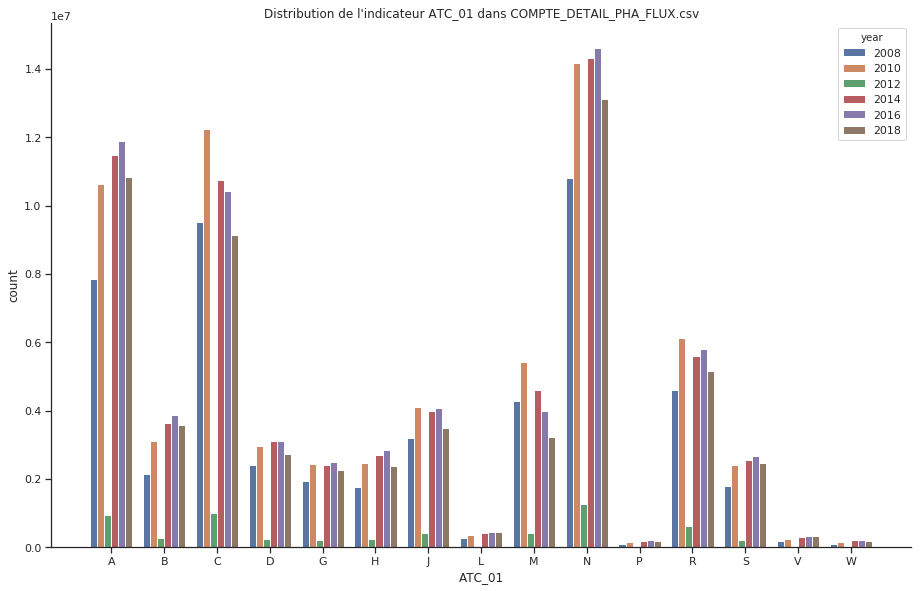

In [19]:
if 'DCIR' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_PHA_FLUX.csv'
    df = pd.read_csv(path2annuels_flux+filename)
    #df.head()
    plot_count_distribution_by_year(df, years=DEFAULT_YEARS, filename=filename, plot_type='grouped_bars')

Filtered left : 0 outliers with mean value nan and 0/1072871086 total counts
Filtered right : 27 outliers with mean value 79.00 and 14819140/1072871086 total counts


<Figure size 1080x576 with 0 Axes>

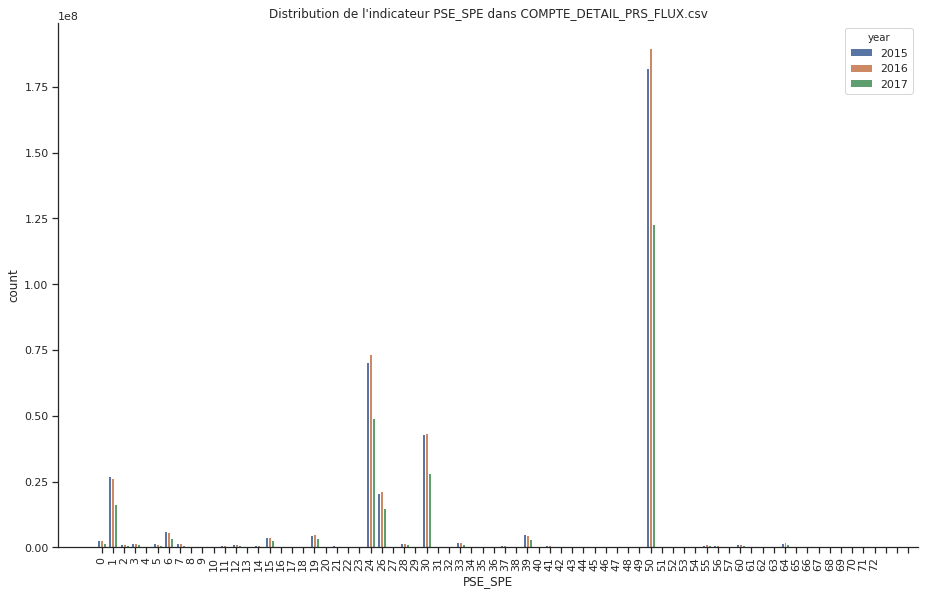

In [20]:
if 'DCIR' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_PRS_FLUX.csv'
    df = pd.read_csv(path2annuels_flux+filename)
    df.head()
    plot_count_distribution_by_year(df, years=[ 2015,2016,2017], filename=filename, plot_type='grouped_bars', filter_in_range=(0, 72))

A nouveau un bon énorme entre 2014 et 2015, cette fois dûe à la pharmacie en officine.

In [21]:
if 'UCD' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_UCD_FLUX.csv'
    df = pd.read_csv(path2annuels_flux+filename)
    df.head()
    plot_count_distribution_by_year(df, years=DEFAULT_YEARS, filename=filename, plot_type='grouped_bars', filter_in_range=None)

Filtered left : 0 outliers with mean value nan and 0/34167917 total counts
Filtered right : 26 outliers with mean value 55.88 and 2963873/34167917 total counts


<Figure size 1080x576 with 0 Axes>

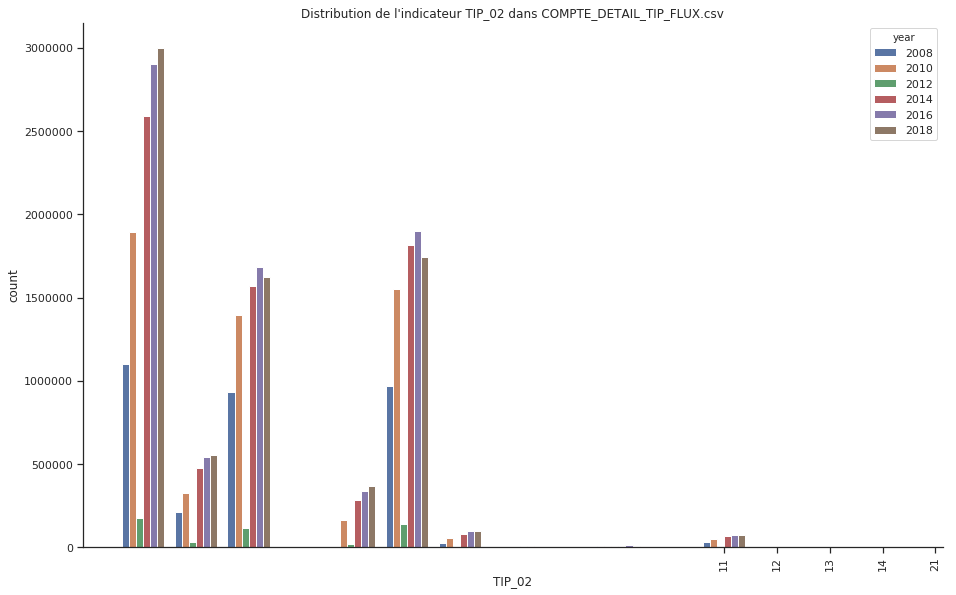

In [22]:
if 'DCIR' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_TIP_FLUX.csv'
    df = pd.read_csv(path2annuels_flux+filename)
    df.head()
    plot_count_distribution_by_year(df, years=DEFAULT_YEARS, filename=filename, plot_type='grouped_bars', filter_in_range=(0, 35))

# Comptes PMSI

## MCO

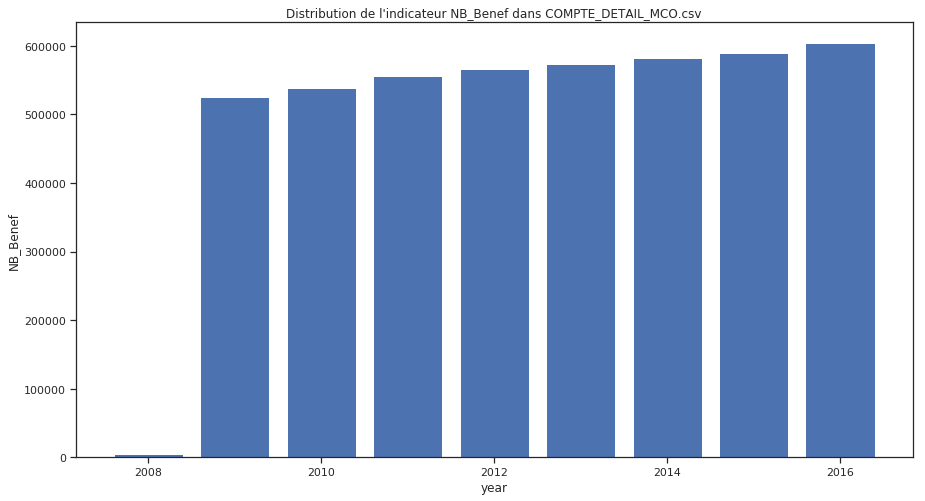

In [23]:
if 'MCO' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_MCO.csv'
    df = pd.read_csv(path2annuels+filename)
    df.head()
    plot_yearly_ts(df, x_min=2008,x_max=2016, filename=filename, plot_type='bar')

<Figure size 1080x576 with 0 Axes>

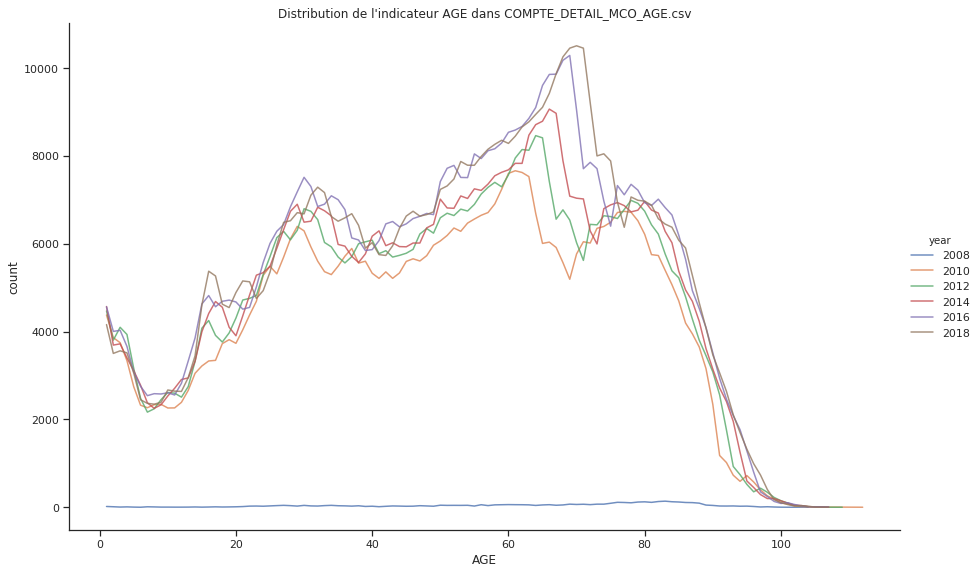

In [24]:
if 'MCO' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_MCO_AGE.csv'
    df = pd.read_csv(path2annuels+filename)
    df.head()
    plot_count_distribution_by_year(df, years=DEFAULT_YEARS, filename=filename, plot_type='lineplot', filter_in_range=None)

<Figure size 1080x576 with 0 Axes>

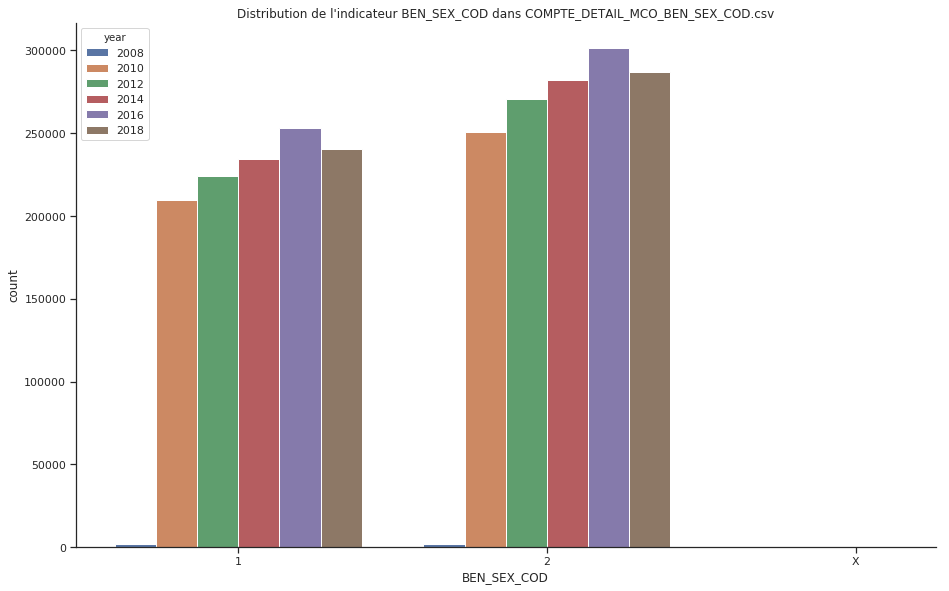

In [25]:
if 'MCO' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_MCO_BEN_SEX_COD.csv'
    df = pd.read_csv(path2annuels+filename)
    df.head()
    plot_count_distribution_by_year(df, years=DEFAULT_YEARS, filename=filename, plot_type='grouped_bars')

## SSR

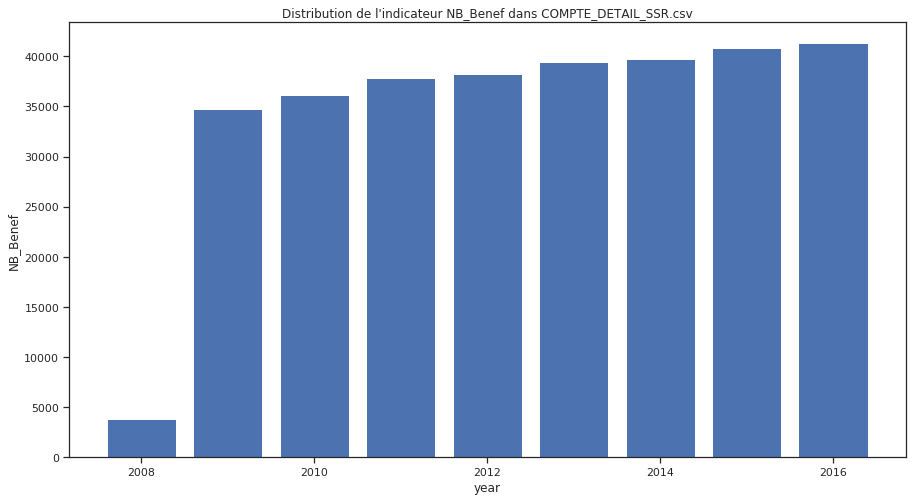

In [26]:
if 'SSR' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_SSR.csv'
    df = pd.read_csv(path2annuels+filename)
    df.head()
    plot_yearly_ts(df, x_min=2008,x_max=2016, filename=filename, plot_type='bar')

Filtered left : 0 outliers with mean value nan and 0/191522 total counts
Filtered right : 2 outliers with mean value 999.00 and 365/191522 total counts


<Figure size 1080x576 with 0 Axes>

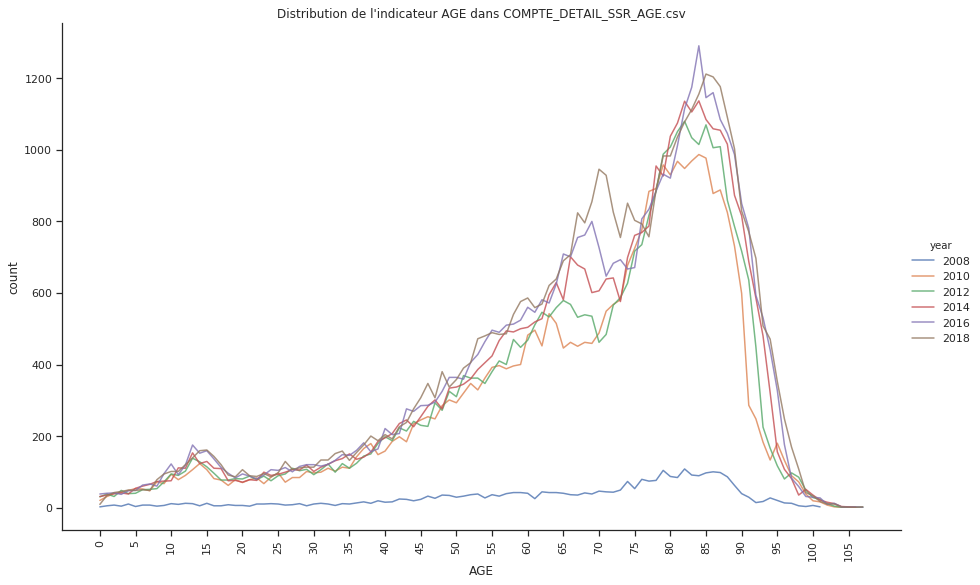

In [27]:
if 'SSR' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_SSR_AGE.csv'
    df = pd.read_csv(path2annuels+filename)
    df.head()
    plot_count_distribution_by_year(df, years=DEFAULT_YEARS, filename=filename, plot_type='lineplot', filter_in_range=(0, 900), xticks_frequency=5)

<Figure size 1080x576 with 0 Axes>

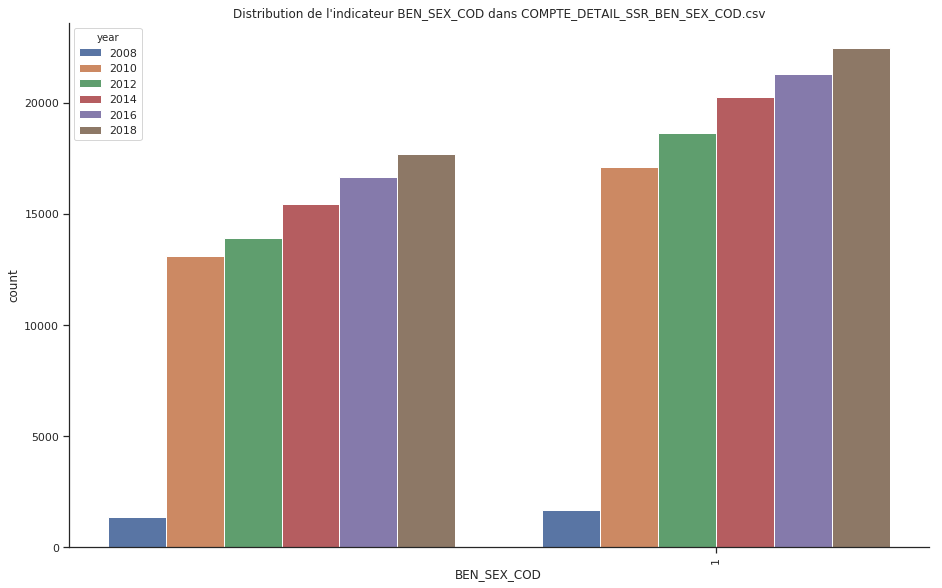

In [28]:
if 'SSR' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_SSR_BEN_SEX_COD.csv'
    df = pd.read_csv(path2annuels+filename)
    df.head()
    plot_count_distribution_by_year(df, years=DEFAULT_YEARS, filename=filename, plot_type='grouped_bars')

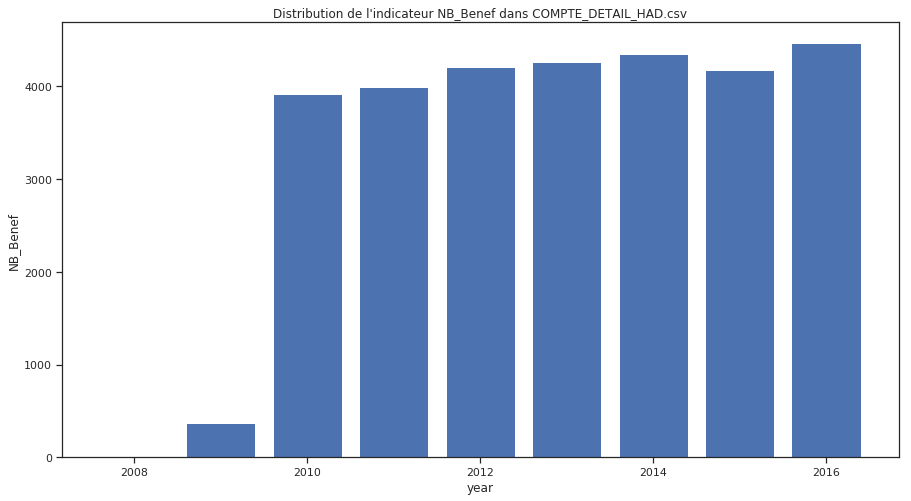

In [29]:
if 'HAD' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_HAD.csv'
    df = pd.read_csv(path2annuels+filename)
    df.head()
    plot_yearly_ts(df, x_min=2008,x_max=2016, filename=filename, plot_type='bar')

Filtered left : 0 outliers with mean value nan and 0/20818 total counts
Filtered right : 0 outliers with mean value nan and 0/20818 total counts


<Figure size 1080x576 with 0 Axes>

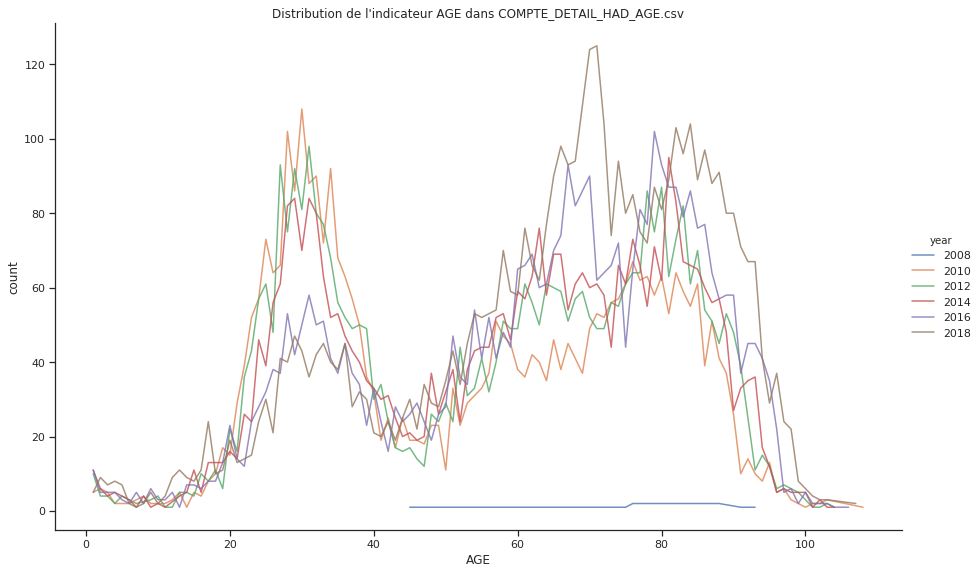

In [30]:
if 'HAD' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_HAD_AGE.csv'
    df = pd.read_csv(path2annuels+filename)
    df.head()
    plot_count_distribution_by_year(df, years=DEFAULT_YEARS, filename=filename, plot_type='lineplot', filter_in_range=(0, 900), xticks_frequency=5)

<Figure size 1080x576 with 0 Axes>

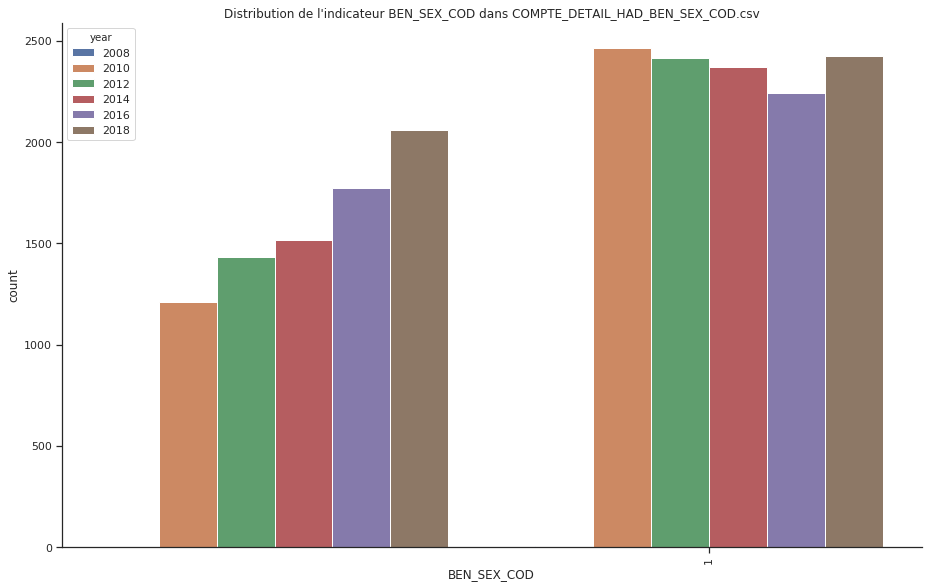

In [31]:
if 'HAD' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_HAD_BEN_SEX_COD.csv'
    df = pd.read_csv(path2annuels+filename)
    df.head()
    plot_count_distribution_by_year(df, years=DEFAULT_YEARS, filename=filename, plot_type='grouped_bars')